In [1]:
import joblib
preprocessor = joblib.load("../models/preprocessor.pkl")
X_train_proc, X_test_proc, y_train, y_test = joblib.load("../models/splits.pkl")

print("X_train_proc shape:", X_train_proc.shape)

X_train_proc shape: (242, 15)


E:\anaconda1\conda1\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\anaconda1\conda1\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\anaconda1\conda1\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\anaconda1\conda1\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when the

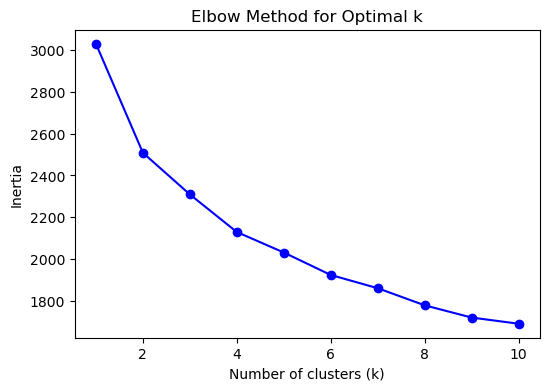

In [2]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Try different k values
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_train_proc)
    inertia.append(kmeans.inertia_)

# Elbow method plot
plt.figure(figsize=(6,4))
plt.plot(K, inertia, "bo-")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

In [4]:
import numpy as np
kmeans_final = KMeans(n_clusters=2, random_state=42, n_init=10)
clusters = kmeans_final.fit_predict(X_train_proc)

print("Cluster counts:", np.bincount(clusters))

Cluster counts: [146  96]


E:\anaconda1\conda1\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


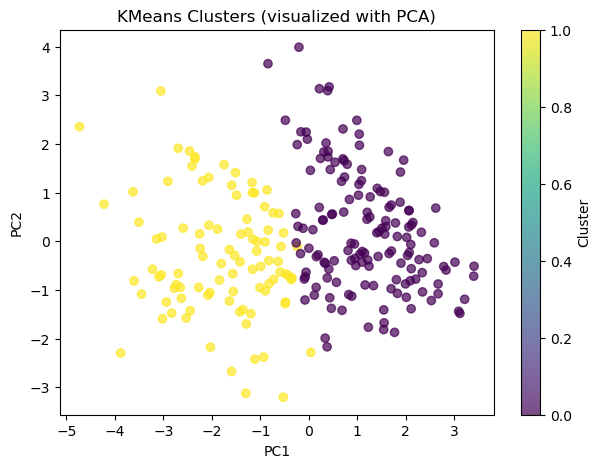

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_train_proc.toarray() if hasattr(X_train_proc, "toarray") else X_train_proc)

plt.figure(figsize=(7,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap="viridis", alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("KMeans Clusters (visualized with PCA)")
plt.colorbar(label="Cluster")
plt.show()

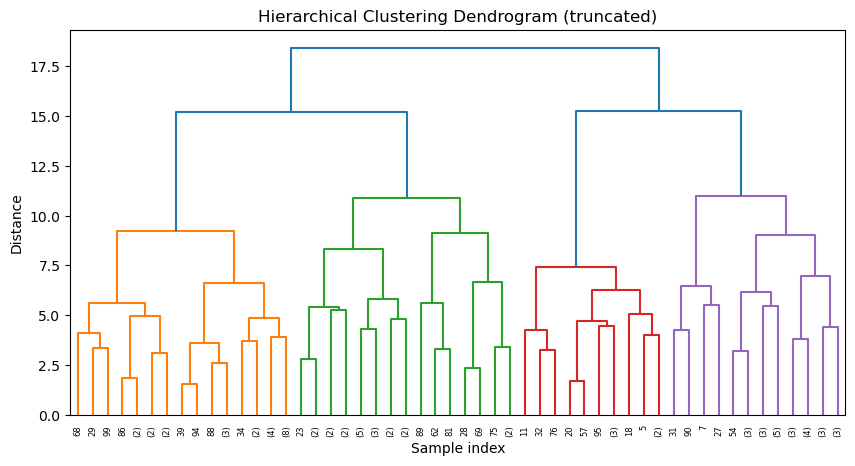

In [7]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Take a sample for clear plotting
sample_n = min(100, X_train_proc.shape[0])
sample_data = X_train_proc[:sample_n].toarray() if hasattr(X_train_proc, "toarray") else X_train_proc[:sample_n]

Z = linkage(sample_data, method="ward")

plt.figure(figsize=(10,5))
dendrogram(Z, truncate_mode="level", p=5)
plt.title("Hierarchical Clustering Dendrogram (truncated)")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()

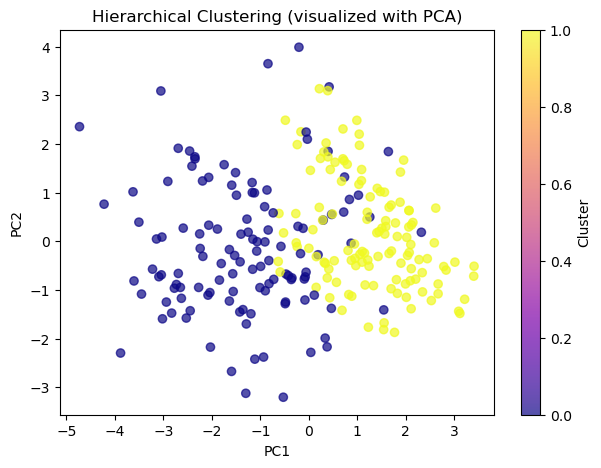

In [8]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=2)
clusters_h = agg.fit_predict(X_train_proc.toarray() if hasattr(X_train_proc, "toarray") else X_train_proc)

plt.figure(figsize=(7,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters_h, cmap="plasma", alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Hierarchical Clustering (visualized with PCA)")
plt.colorbar(label="Cluster")
plt.show()